In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [5]:
features, targets = make_classification(n_samples = 20,
                                        n_features = 2,
                                        n_informative = 1,
                                        n_redundant = 0,
                                        n_clusters_per_class = 1,
                                        random_state = 1

)

In [6]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


In [7]:
features.shape

(20, 2)

In [8]:
targets.shape

(20,)

In [9]:
np.bincount(targets)

array([10, 10])

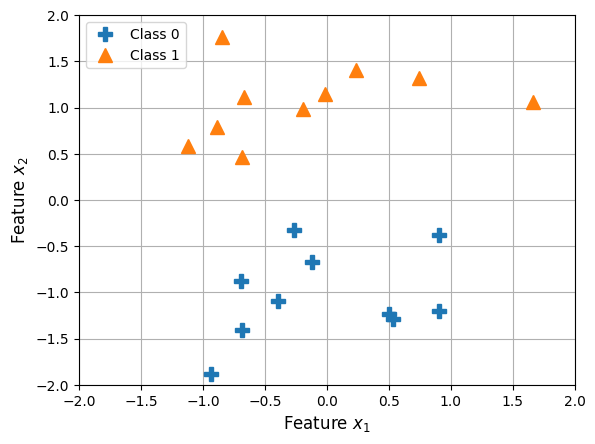

In [10]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1'
)
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('Feature $x_1$', fontsize = 12)
plt.ylabel('Feature $x_2$', fontsize = 12)
plt.grid()
plt.show()

In [11]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [12]:
ppn.bias

0

 $z = (x_1 \cdot w_1) + (x_2 \cdot w_2) + ... + b$

In [13]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    
ppn = Perceptron(num_features = 2)
x  = [1.23, 2.13]
ppn.forward(x)
        

0

In [14]:
# class Perceptron:
#     def __init__(self, num_features):
#         self.num_features = num_features
#         self.weights = [0.0 for _ in range(num_features)]
#         self.bias = 0

#     def forward(self, x):
#         weighted_sum_z = self.bias
#         for i, _ in enumerate(self.weights):
#             weighted_sum_z += x[i] * self.weights[i]

#         if weighted_sum_z > 0:
#             prediction = 1
#         else:
#             prediction = 0

#         return prediction

#     def update(self, x, y_true):
#         prediction = self.forward(x)
#         error = y_true - prediction

#         self.bias += error
#         for i, _ in enumerate(self.weights):
#             self.weights[i] += error * x[i]


#         return error

# ppn = Perceptron(num_features = 2)
# x = [1.1, 2.1]
# ppn.update(x, y_true = 1)

In [15]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [0.0, 0.0]
Bias: 0.0


 $z = (x_1 \cdot w_1) + (x_2 \cdot w_2) + ... + b$

In [16]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.forward(x)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

In [17]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 5)

Epoch 1 errors 0
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0


In [18]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [19]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 0.5


In [20]:
def plot_boundary(model):
    try:

        w1, w2 = model.weights[0], model.weights[1]
        b = model.bias

        # z = w1*x1 + w2*x2 + b = 0
        # => x2 = (-w1*x1 - b) / w2

        x1_min = -20
        x2_min = (-(w1 * x1_min) - b) / w2

        x1_max = 20
        x2_max = (-(w1 * x1_max) - b) / w2
    except ZeroDivisionError:
        return 1, 1, 1, 1
    return x1_min, x1_max, x2_min, x2_max

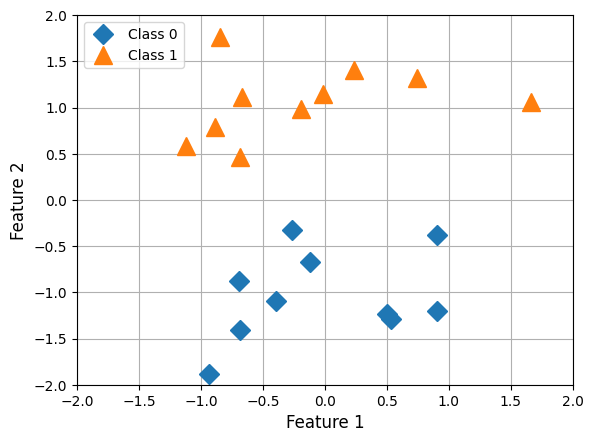

In [21]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

# Plot the decision boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature 1", fontsize=12), 
plt.ylabel("Feature 2", fontsize=12)
plt.grid()
plt.show()